# Prova MAC0459 - 2021
## Questão 2
**Aluno:** Daniel Angelo Esteves Lawand - **NUSP:** 10297693  
**Professor:** Roberto Hirata

### Dataset

Analisaremos alguns dados do dataset [Heart Disease](https://www.kaggle.com/ronitf/heart-disease-uci), sendo estes:
1. Idade do paciente (*age*)
2. Sexo do paciente (*sex*)
3. Pressão arterial em repouso (*trestbps*)
4. *ST depression induced by exercise relative to rest* (*oldpeak*)

Com 304 pacientes observados, este dataset oferece uma alta variabilidade de pacientes, tendo de jovens a idosos de ambos os sexos, com doença ou não.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# Criação do dataframe
df_heart = pd.read_csv("heart.csv")
df_heart[['age', 'trestbps', 'cp']]


,age,trestbps,cp
0,63,145,3
1,37,130,2
2,41,130,1
3,56,120,1
4,57,120,0
...,...,...,...
298,57,140,0
299,45,110,3
300,68,144,0
301,57,130,0


In [4]:
features = ['age', 'trestbps', 'oldpeak']
x = df_heart[features]
y = df_heart['sex']

x_treinado, x_validado, y_treinado, y_validado = train_test_split(x, y, test_size=0.3, random_state=0)

In [5]:
random_forest = RandomForestClassifier(random_state=0)
decision_tree = DecisionTreeClassifier(random_state=0)

In [6]:
# Parâmetros para modelo de Random Forest
criterion = ['gini', 'entropy']
max_depth = [4, 5, 6]
n_estimators = [50, 100, 500]
max_features = ['auto', 'sqrt', 'log2']
params_random_forest = dict(criterion=criterion, n_estimators=n_estimators, max_features=max_features, max_depth=max_depth)

# Parâmetros para modelo de Decision Tree
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [4, 5, 6]
min_samples_leaf = [0.1, 0.2, 0.3]
max_features = ['auto', 'sqrt', 'log2']
params_decision_tree = dict(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf, max_features=max_features)

In [7]:
# Random Forest
random_forest_grid = GridSearchCV(random_forest, params_random_forest, cv=5, scoring='accuracy', n_jobs=-1, verbose=True)
random_forest_grid.fit(x_treinado, y_treinado)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 500]},
             scoring='accuracy', verbose=True)

In [8]:
# Decision Tree
decision_tree_grid = GridSearchCV(decision_tree, params_decision_tree, cv=5, scoring='accuracy', n_jobs=-1, verbose=True)
decision_tree_grid.fit(x_treinado, y_treinado)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [0.1, 0.2, 0.3],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=True)

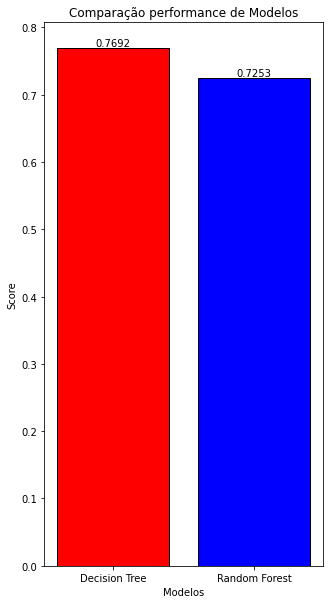

In [9]:
score_decision_tree = decision_tree_grid.score(x_validado, y_validado)
score_random_forest = random_forest_grid.score(x_validado, y_validado)

models = np.array(['Decision Tree', 'Random Forest'])

scores_validacao = np.array([score_decision_tree, score_random_forest])
scores_validacao = np.around(scores_validacao, 4)

fig = plt.figure(figsize = (5, 10))

plt.bar(models, scores_validacao, color=['red', 'blue'], ec='black')

for i in range(len(scores_validacao)):
    plt.text(i, scores_validacao[i], scores_validacao[i], ha='center', va='bottom')

plt.title('Comparação performance de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Score')
plt.show()